# Multinomial Naïve Bayes Classifier - the YouTube Dataset

### Introducing the database

The database for this example is taken from https://archive.ics.uci.edu/ml/machine-learning-databases/00380/ 

### Importing the necessary libraries

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

### Reading the database

In [7]:
# Use glob package to return all file paths that match a specific pattern.
# /*.csv --> include all CSV files
files = glob.glob('youtube-dataset//*.csv')
files

['youtube-dataset/Youtube03.csv',
 'youtube-dataset/Youtube02.csv',
 'youtube-dataset/Youtube01.csv',
 'youtube-dataset/Youtube05.csv',
 'youtube-dataset/Youtube04.csv']

In [14]:
# Create a for loop to read all the datasets 
# Remove useless column
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis= 1))

In [15]:
# Double check dataset
all_df[0]

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
433,Like this comment for no reason﻿,1
434,love this song﻿,0
435,this song is awesome. these guys are the best....,1
436,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [16]:
# Create a new dataframe to contain all the imported datasets
data = pd.concat(all_df, axis= 0, ignore_index= True)
data

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
1950,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
1951,Check out my videos guy! :) Hope you guys had ...,1
1952,3 yrs ago I had a health scare but thankfully ...,1
1953,Rihanna looks so beautiful with red hair ;)﻿,0


In [18]:
# Check missing value in the new dataframe
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [20]:
# Count the values in CLASS column
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

### Sample 1

In [22]:
message_sample = ['This is a dog']

vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(message_sample)
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]])

In [23]:
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [24]:
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]])

### Sample 2

In [25]:
message_sample2 = ['This is a dog and that is a dog', 'This is a cat']
vectorizer_sample2 = CountVectorizer()
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]])

In [26]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [27]:
vectorizer_sample2.transform(['Those are birds.']).toarray()

array([[0, 0, 0, 0, 0, 0]])

### Defining the inputs and the target. Creating the train-test split.

In [30]:
inputs = data['CONTENT']
target = data['CLASS']

In [31]:
# Stratify argument is to make sure equal portion of the two classes enter into the training and testing set
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size= 0.2, random_state= 365, stratify= target)

In [32]:
y_train.value_counts(normalize= True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [33]:
y_test.value_counts(normalize= True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

### Tokenizing the YouTube comments

In [34]:
vectorizer = CountVectorizer()
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [35]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
x_train_transf.shape

(1564, 3903)

In [39]:
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [38]:
x_test_transf.shape

(391, 3903)

In [40]:
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

### Performing the classification

In [43]:
clf = MultinomialNB()

In [45]:
clf.fit(x_train_transf, y_train)

MultinomialNB()

In [46]:
# Return the parameters of the classifier
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

### Performing the evaluation on the test dataset

In [48]:
y_test_pred = clf.predict(x_test_transf)

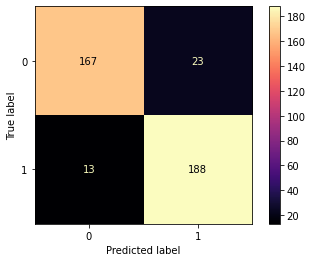

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels= clf.classes_, cmap= 'magma')

In [53]:
print(classification_report(y_test, y_test_pred, target_names= ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.93      0.88      0.90       190
        Spam       0.89      0.94      0.91       201

    accuracy                           0.91       391
   macro avg       0.91      0.91      0.91       391
weighted avg       0.91      0.91      0.91       391



### Making predictions using new sample content

In [55]:
new_sample_transf = vectorizer.transform(['This is a great house', 'You can earn a lot of money, just follow the steps below'])


In [56]:
clf.predict(new_sample_transf)

array([0, 1])